# 🔤 Sahte Haber Analizi - Kelime ve Metin Analizi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 10)
print("✅ Metin analizi hazır!")

✅ Metin analizi hazır!


In [2]:
# Veri yükleme
fake_news = pd.read_csv('../data/Fake.csv')
real_news = pd.read_csv('../data/True.csv')

fake_news['type'] = 'Sahte'
real_news['type'] = 'Gerçek'

df = pd.concat([fake_news, real_news], ignore_index=True)
print(f"📊 {len(df):,} haber yüklendi")

📊 44,898 haber yüklendi


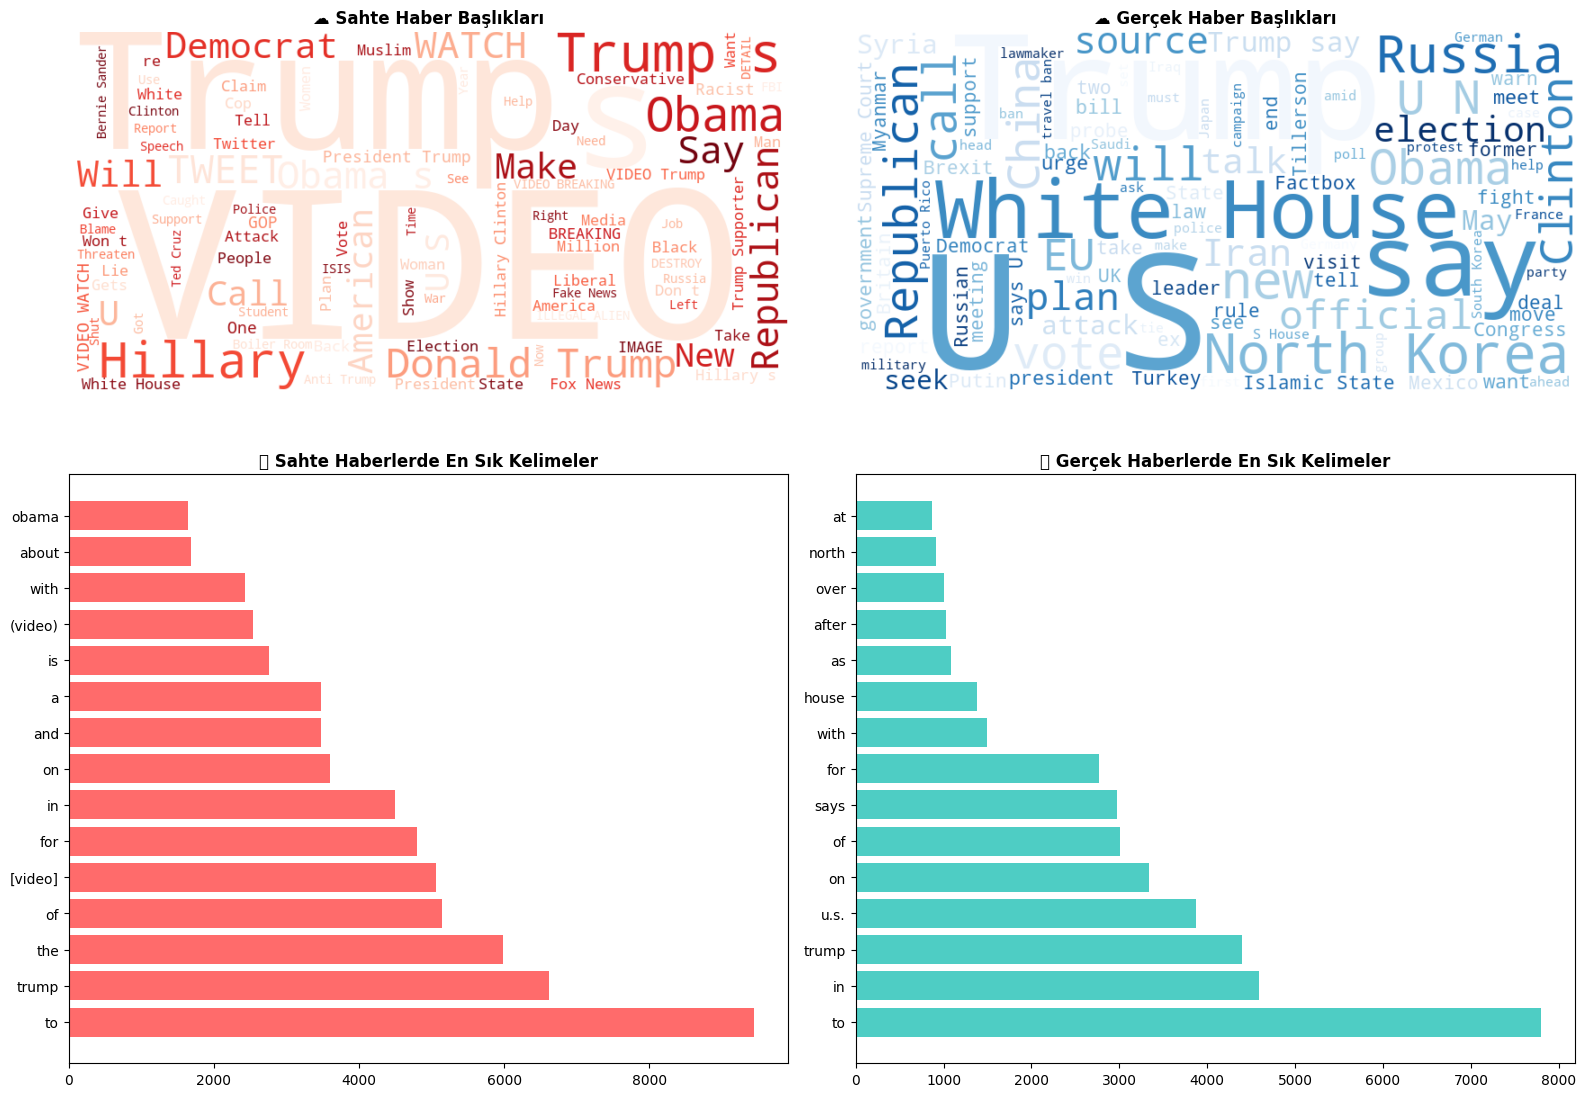

In [3]:
# Kelime bulutu oluşturma
def create_wordcloud(text_data, color_scheme='viridis'):
    combined_text = ' '.join(text_data.astype(str))
    
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         colormap=color_scheme,
                         max_words=100,
                         relative_scaling=0.5,
                         random_state=42).generate(combined_text)
    
    return wordcloud

# Kelime bulutları
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sahte haber başlıkları
fake_wc = create_wordcloud(df[df['type'] == 'Sahte']['title'], 'Reds')
axes[0,0].imshow(fake_wc, interpolation='bilinear')
axes[0,0].set_title('☁️ Sahte Haber Başlıkları', fontweight='bold')
axes[0,0].axis('off')

# Gerçek haber başlıkları
real_wc = create_wordcloud(df[df['type'] == 'Gerçek']['title'], 'Blues')
axes[0,1].imshow(real_wc, interpolation='bilinear')
axes[0,1].set_title('☁️ Gerçek Haber Başlıkları', fontweight='bold')
axes[0,1].axis('off')

# En sık kelimeler
fake_words = ' '.join(df[df['type'] == 'Sahte']['title']).lower().split()
real_words = ' '.join(df[df['type'] == 'Gerçek']['title']).lower().split()

fake_top = Counter(fake_words).most_common(15)
real_top = Counter(real_words).most_common(15)

# Sahte haber top kelimeler
words, counts = zip(*fake_top)
axes[1,0].barh(range(len(words)), counts, color='#ff6b6b')
axes[1,0].set_yticks(range(len(words)))
axes[1,0].set_yticklabels(words)
axes[1,0].set_title('🔥 Sahte Haberlerde En Sık Kelimeler', fontweight='bold')

# Gerçek haber top kelimeler
words, counts = zip(*real_top)
axes[1,1].barh(range(len(words)), counts, color='#4ecdc4')
axes[1,1].set_yticks(range(len(words)))
axes[1,1].set_yticklabels(words)
axes[1,1].set_title('📰 Gerçek Haberlerde En Sık Kelimeler', fontweight='bold')

plt.tight_layout()
plt.savefig('../analysis/kelime_analizi.png', dpi=300, bbox_inches='tight')
plt.show()